<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Hidden Layer Deep Network: Sigmoid, Tanh and Relu Activations Functions MNIST Dataset</h1>


<h3>Objective for this Notebook<h3>    
<h5> 1. Define Several Neural Network, Criterion function, Optimizer.</h5>
<h5> 2. Test Sigmoid ,Tanh and Relu. </h5>
<h5> 3. Analyse Results. </h5>     


<h2>Table of Contents</h2>
<p>In this lab, you will test Sigmoid, Tanh and Relu activation functions on the MNIST dataset with two hidden Layers.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid ,Tanh and Relu </a></li>
    <li><a href="#Result">Analyse Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


We'll need the following libraries


In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

!pip install torchvision==0.9.1 torch==1.8.1 
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

     |████████████████████████████████| 17.4 MB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 804.1 MB 560 bytes/s  0:00:013   |▎                               | 6.0 MB 41.7 MB/s eta 0:00:20     |▌                               | 13.8 MB 41.7 MB/s eta 0:00:19     |█                               | 22.7 MB 41.7 MB/s eta 0:00:19     |████▋                           | 117.2 MB 10.2 MB/s eta 0:01:08     |██████                          | 148.5 MB 10.2 MB/s eta 0:01:05MB 10.2 MB/s eta 0:01:02     |██████████▊                     | 270.4 MB 16.8 MB/s eta 0:00:32MB/s eta 0:00:32     |██████████████▊                 | 371.0 MB 10.3 MB/s eta 0:00:43:00:27
  Attempting uninstall: torch
    Found existing installation: torch 1.5.0
    Uninstalling torch-1.5.0:
      Successfully uninstalled torch-1.5.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.2.1
    Uninstalling torchvision-0.2.1:
      Successfully uninstalled torchvision-0.2.1


<!--Empty Space for separating topics-->


<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the neural network module or class, with two hidden Layers 


<img src="https://ibm.box.com/shared/static/5wtclahun0f70qlwkn2kxzh3amnbq4zg.png" width="200" alt="Neural Network Model" />


In [2]:
# Create the model class using sigmoid as the activation function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x)) 
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

Define the class with the Tanh activation function 


In [6]:
# Create the model class using Tanh as a activation function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

Define the class for the Relu activation function 


In [5]:
# Create the model class using Relu as a activation function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

Define a function to  train the model, in this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 


In [7]:
# Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2> 


Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [8]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [9]:
# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function  


In [10]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object 


In [11]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->


<h2 id="Train">Define Neural Network, Criterion function, Optimizer and Train the Model</h2> 


Create  the model with 100 hidden layers  


In [12]:
# Set the parameters for create the model

input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

The epoch number in the video is 35. You can try 10 for now. If you try 35, it may take a long time.


In [13]:
# Set the number of iterations

cust_epochs = 10

<!--Empty Space for separating topics-->


<h2 id="Test">Test Sigmoid ,Tanh and Relu</h2> 


Train the network using the Sigmoid activation function


In [14]:
# Train the model with sigmoid function

learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

Train the network using the Tanh activation function


In [15]:
# Train the model with tanh function

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

Train the network using the Relu activation function


In [16]:
# Train the model with relu function

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

<!--Empty Space for separating topics-->


<h2 id="Result">Analyze Results</h2> 


Compare the training loss for each activation 


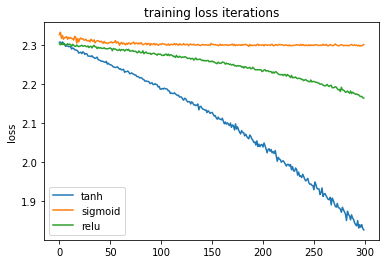

In [17]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model  


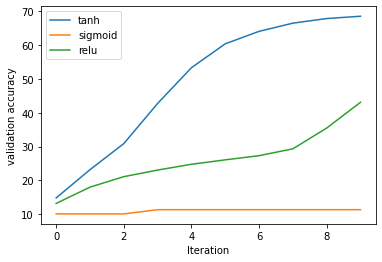

In [18]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()

<!--Empty Space for separating topics-->


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-23        | 2.0     | Srishti    | Migrated Lab to Markdown and added to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
